In [1]:
# Big data and Machine learning for forecasting total mobile subscription
import pandas as pd
import matplotlib.pyplot as pyplot
import numpy as np
import seaborn as sns 

In [2]:
# Importing as dataframe
path = 'https://raw.githubusercontent.com/bigdatatest123/bigdata/main/total-mobile-phone-subscriptions.csv'
dataset = pd.read_csv(path, parse_dates=['month'] ) 

In [3]:
# Sample the first 20 records
dataset.head(20)

,month,total_mobile_subscription
0,1997-01-01,414000
1,1997-02-01,423000
2,1997-03-01,431000
3,1997-04-01,479000
4,1997-05-01,510000
5,1997-06-01,546000
6,1997-07-01,588000
7,1997-08-01,611000
8,1997-09-01,640000
9,1997-10-01,672000


In [4]:
# Changing null value to zero to avoid errors
dataset = dataset.fillna(0)

In [5]:
# Preparing column names
x = pd.to_datetime(dataset['month'], format='%Y-%m')

# Replacing NaN values with 0 in dataFrame
dataset = dataset.fillna(0)

y = dataset['total_mobile_subscription'].values.reshape(-1, 1)

In [6]:
# Sample the first 20 records after data processing
dataset.head(20)

,month,total_mobile_subscription
0,1997-01-01,414000
1,1997-02-01,423000
2,1997-03-01,431000
3,1997-04-01,479000
4,1997-05-01,510000
5,1997-06-01,546000
6,1997-07-01,588000
7,1997-08-01,611000
8,1997-09-01,640000
9,1997-10-01,672000


In [7]:
# Splitting dataset
from sklearn import model_selection 
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.2, random_state = 0)
 
print ("x_train: ", x_train)
print ("y_train: ", y_train)
print ("x_test: ", x_test)
print ("y_test: ", y_test)

x_train:  176   2011-09-01
261   2018-10-01
157   2010-02-01
27    1999-04-01
173   2011-06-01
         ...    
251   2017-12-01
192   2013-01-01
117   2006-10-01
47    2000-12-01
172   2011-05-01
Name: month, Length: 227, dtype: datetime64[ns]
y_train:  [[7667500]
 [8289900]
 [6865000]
 [1115500]
 [7537000]
 [7755200]
 [8344000]
 [8399700]
 [1578400]
 [6878900]
 [7808200]
 [8260800]
 [5339600]
 [8341600]
 [8398400]
 [3935400]
 [8123900]
 [7017200]
 [4414800]
 [8780100]
 [2162600]
 [8166100]
 [6216100]
 [4384600]
 [4416000]
 [3020300]
 [8236700]
 [ 925200]
 [6706300]
 [8233100]
 [4161300]
 [8228000]
 [3244800]
 [8399800]
 [8164900]
 [7903600]
 [8986000]
 [7995400]
 [1357600]
 [3477100]
 [6079500]
 [2920100]
 [9049100]
 [8522900]
 [ 983900]
 [1164000]
 [8308200]
 [ 876400]
 [3080400]
 [3296400]
 [5993800]
 [6857200]
 [6375500]
 [4340600]
 [7957100]
 [ 510000]
 [3899600]
 [6745800]
 [2954000]
 [4310700]
 [3102200]
 [2900300]
 [3086500]
 [1094700]
 [4911500]
 [7794300]
 [7243800]
 [843940

In [8]:
# Calling describe method
dataset.describe()

,total_mobile_subscription
count,2.840000e+02
mean,5.526925e+06
std,2.763352e+06
min,4.140000e+05
25%,3.228075e+06
50%,6.284900e+06
75%,8.200000e+06
max,9.076600e+06


In [9]:
# Using Linear regression model to make a forecast
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

reg = linear_model.LinearRegression()
reg.fit(x_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [10]:
# Regression intercept
print("Intercept: ", reg.intercept_)

# Regression coefficients
print("Coefficient: ", reg.coef_)

Intercept:  [-9781158.0995336]
Coefficient:  [[1.25108138e-11]]


In [11]:
# Prediction of test set
y_pred = reg.predict(x.values.astype(float).reshape(-1, 1))
 
# Predicted values
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [[  879016.05289042]
 [  912525.0164602 ]
 [  942791.17710387]
 [  976300.14067364]
 [ 1008728.16993472]
 [ 1042237.1335045 ]
 [ 1074665.16276557]
 [ 1108174.12633535]
 [ 1141683.08990513]
 [ 1174111.1191662 ]
 [ 1207620.08273598]
 [ 1240048.11199705]
 [ 1273557.07556683]
 [ 1307066.03913661]
 [ 1337332.19978028]
 [ 1370841.16335005]
 [ 1403269.19261113]
 [ 1436778.15618091]
 [ 1469206.18544198]
 [ 1502715.14901176]
 [ 1536224.11258154]
 [ 1568652.14184261]
 [ 1602161.10541239]
 [ 1634589.13467347]
 [ 1668098.09824324]
 [ 1701607.06181302]
 [ 1731873.22245669]
 [ 1765382.18602647]
 [ 1797810.21528754]
 [ 1831319.17885732]
 [ 1863747.20811839]
 [ 1897256.17168817]
 [ 1930765.13525795]
 [ 1963193.16451902]
 [ 1996702.1280888 ]
 [ 2029130.15734988]
 [ 2062639.12091965]
 [ 2096148.08448943]
 [ 2127495.1794418 ]
 [ 2161004.14301158]
 [ 2193432.17227265]
 [ 2226941.13584243]
 [ 2259369.16510351]
 [ 2292878.12867329]
 [ 2326387.09224306]
 [ 2358815.12150414]
 [ 239232

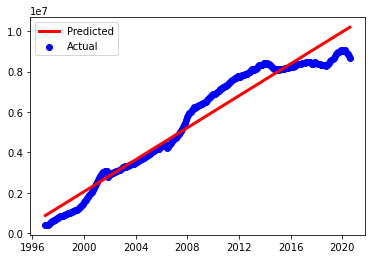

In [12]:
# Plotting regression line 
f, ax = pyplot.subplots(1, 1)
ax.plot(x, y_pred, label = 'Predicted', lw = 3, color = 'red')
ax.scatter(x, y, label = 'Actual', marker = 'o', color = 'blue')
ax.legend();
pyplot.show()

In [13]:
# Model evaluation
from sklearn import metrics
from math import sqrt
 
rSq = reg.score(x.values.astype(float).reshape(-1, 1),y.reshape(-1, 1))*100
meanAbErr = metrics.mean_absolute_error(y, y_pred)
meanSqErr = metrics.mean_squared_error(y, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y, y_pred))

print('R-Squared: {:.2f}'.format(rSq))
print('Mean Absolute Error: {:.2f}'. format(meanAbErr))
print('Mean Squared Error: {:.2f}'. format(meanSqErr))
print('Root Mean Squared Error: {:.2f}'. format(rootMeanSqErr))

R-Squared: 94.93
Mean Absolute Error: 511447.56
Mean Squared Error: 385739091911.27
Root Mean Squared Error: 621078.97


In [14]:
# Using ARIMA model to make a forecast
from statsmodels.tsa.arima.model import ARIMA
 
# Splitting dataset
x_arr = np.array(y).ravel()
size = int(len(x_arr) * 0.66)
x_train, x_test = x_arr[0:size], x_arr[size:len(x_arr)]
y_train = [x_arr for x_arr in x_train]
predictions = list()

C:\Users\was\.conda\envs\top\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\was\.conda\envs\top\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [15]:
reg_ARIMA = linear_model.LinearRegression()
reg_ARIMA.fit( np.array(x_train).reshape(-1, 1),  y_train)

LinearRegression()

In [16]:
# Regression intercept
print("Intercept: ", reg_ARIMA.intercept_)

# Regression coefficients
print("Coefficient: ", reg_ARIMA.coef_)

Intercept:  0.0
Coefficient:  [1.]


In [17]:
# Calculating predicted and actual
for t in range(len(x_test)):
	model = ARIMA(y_train, order=(5,1,0))
	model_fit = model.fit() 
	model_forecast = model_fit.forecast()
	y_pred = model_forecast[0]
	predictions.append(y_pred)
	x_actu = x_test[t]
	y_train.append(x_actu)
	print('Predicted=%f, Actual=%f' % (y_pred, x_actu))

Predicted=7900153.865372, Actual=7897700.000000
Predicted=7911539.484082, Actual=7903600.000000
Predicted=7916330.233371, Actual=7957100.000000
Predicted=7980795.971997, Actual=7995400.000000
Predicted=8014967.948751, Actual=8063000.000000
Predicted=8092267.746736, Actual=8112800.000000
Predicted=8142992.299221, Actual=8130100.000000
Predicted=8158380.871327, Actual=8067600.000000
Predicted=8073152.863079, Actual=8111400.000000
Predicted=8132613.704739, Actual=8144600.000000
Predicted=8154016.151561, Actual=8196200.000000
Predicted=8210207.121325, Actual=8258400.000000
Predicted=8280797.206472, Actual=8303600.000000
Predicted=8335365.878823, Actual=8344000.000000
Predicted=8375957.263479, Actual=8344400.000000
Predicted=8366983.698628, Actual=8390000.000000
Predicted=8418694.171816, Actual=8420700.000000
Predicted=8441650.579503, Actual=8402100.000000
Predicted=8410626.387341, Actual=8388400.000000
Predicted=8393680.957290, Actual=8437800.000000
Predicted=8454582.951827, Actual=8392200

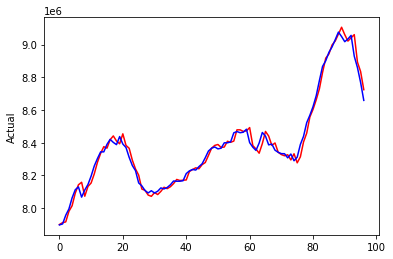

In [18]:
# Plotting regression line
pyplot.plot(predictions, color = 'red')
pyplot.plot(x_test, color = 'blue')
pyplot.ylabel('Actual')
pyplot.show()

In [19]:
# Model evaluation
from sklearn.metrics import mean_squared_error

rSq = reg_ARIMA.score(x_arr.astype(float).reshape(-1, 1), y.reshape(-1, 1))*100
meanAbErr = metrics.mean_absolute_error(x_test.astype(float), predictions)
meanSqErr = mean_squared_error(x_test.astype(float), predictions)
rootMeanSqErr = np.sqrt(mean_squared_error(x_test.astype(float), predictions))

print('R-Squared: {:.2f}'.format(rSq))
print('Mean Absolute Error: {:.2f}'. format(meanAbErr))
print('Mean Squared Error: {:.2f}'. format(meanSqErr))
print('Root Mean Squared Error: {:.2f}'. format(rootMeanSqErr))

R-Squared: 100.00
Mean Absolute Error: 26767.74
Mean Squared Error: 1279696238.92
Root Mean Squared Error: 35772.84
